<h1> Applying Models - Decision Tree <h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<h2> Loading Data <h2>

In [2]:
arr2= np.load('data_array_non_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[25000000 8.176863 113.0 ... 1 0 0]
 [250000000 26.058586 131.0 ... 0 0 0]
 [30000000 4.8170519999999994 102.0 ... 0 0 0]
 ...
 [3000000 5.630136 90.0 ... 0 0 0]
 [2000000 0.14257999999999998 96.0 ... 0 0 0]
 [2200000 1.132835 154.0 ... 0 0 0]] ['Average' 'Good' 'Average' ... 'Average' 'Bad' 'Average']
5253 5253 1314 1314


<h2> Default Decision Tree Classifier <h2>

In [3]:
###Classify using decision tree (DT) classifer

from sklearn.tree import DecisionTreeClassifier #import the DT classifier

clf1 = DecisionTreeClassifier() #declare a DT classifier
clf1.fit(X_train, y_train); #train the classifier

print ('Testing score: ',clf1.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf1.score (X_train, y_train)) # print the trainig score(accuracy)
y_pred =clf1.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

#lets print classification Report
print(classification_report(y_test, y_pred))

#Lets print confision matrix
print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))


Testing score:  0.715372907153729
Training Score:  1.0
F1 Score: 0.7153103914194666
              precision    recall  f1-score   support

     Average       0.82      0.83      0.82      1038
         Bad       0.35      0.31      0.33       187
        Good       0.23      0.28      0.26        89

    accuracy                           0.72      1314
   macro avg       0.47      0.47      0.47      1314
weighted avg       0.72      0.72      0.72      1314

Confusion Matrix values 
 [[857 101  80]
 [127  58   2]
 [ 57   7  25]]


<h2> Finding best min_samples_split <h2>

In [4]:
from sklearn.metrics import f1_score
#We want to change min_samples_split for a range and find the best value

test_score = []
train_score = []
min_samples_split = []
f1_scores = []

for i in range(2,151):
    clf = DecisionTreeClassifier(min_samples_split = i)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    min_samples_split.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(min_samples_split,test_score,train_score,f1_scores)),columns = ['min_samples_split','test_score','train_score','f1_scores'])

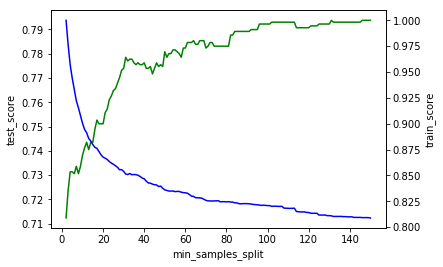

In [5]:
#Plot train and test score as min_samples needed to split increases
sns.lineplot(x=df['min_samples_split'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['min_samples_split'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

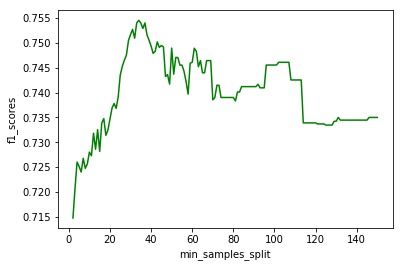

In [6]:
sns.lineplot(x= df['min_samples_split'],y=df['f1_scores'], color="g")
plt.show()

In [7]:
#Based on the f1_score, lets find the best value for max_leaf_nodes
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])
best_min_samples_split = df['min_samples_split'].values[maxF1Score]

Best Row based on f1_score
min_samples_split    34.000000
test_score            0.777778
train_score           0.850752
f1_scores             0.754523
Name: 32, dtype: float64


<h2> Finding best max_leaf_nodes <h2>

In [8]:
#We want to change max_leaf_nodes for a range and find the best value (with the best min_samples_split param)

test_score = []
train_score = []
max_leaf_nodes = []
f1_scores = []

for i in range(5,201):
    clf = DecisionTreeClassifier(max_leaf_nodes = i,min_samples_split=best_min_samples_split)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    max_leaf_nodes.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(max_leaf_nodes,test_score,train_score,f1_scores)),columns = ['max_leaf_nodes','test_score','train_score','f1_scores'])

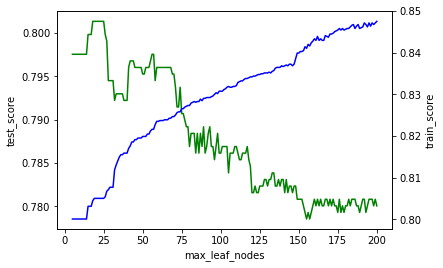

In [9]:

sns.lineplot(x=df['max_leaf_nodes'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['max_leaf_nodes'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

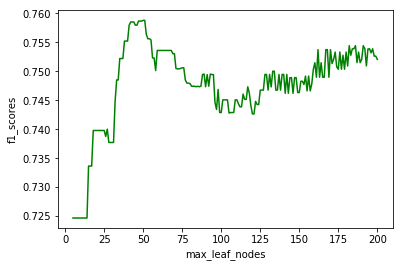

In [10]:
sns.lineplot(x= df['max_leaf_nodes'],y=df['f1_scores'], color="g")
plt.show()

In [11]:
#Based on the f1_score, lets find the best value for max_leaf_nodes
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])
best_max_leaf_nodes =  df['max_leaf_nodes'].values[maxF1Score]

Best Row based on f1_score
max_leaf_nodes    50.000000
test_score         0.795282
train_score        0.819912
f1_scores          0.758803
Name: 45, dtype: float64


<h2> Results <h2>

<div> Does the tree work well with different combination of training and testing data? </div>

In [12]:
#Based on the above, we have determined the best_max_leaf_nodes and best_min_samples_split
 
#lets make sure that the results are consistent with different samples

test_score = []
train_score = []
f1_scores = []

clf = DecisionTreeClassifier(max_leaf_nodes = best_max_leaf_nodes,min_samples_split=best_min_samples_split) #declare my tree
#check 50 times with data
for i in range(50):
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    

df = pd.DataFrame(list(zip(test_score,train_score,f1_scores)),columns = ['test_score','train_score','f1_scores'])    


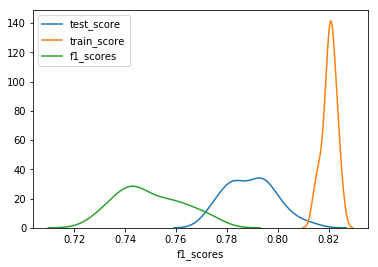

In [13]:
#lets check how the values are distributed when we use random training and testing data

for col in df.columns:
    sns.distplot(df[col],hist=False,label=col)

<h4> We can see that there is not a great variation between the test_scores, train_scores, and F1_scores in random models, so we can move forward</h4>

Testing score:  0.773972602739726
Training Score:  0.8250523510375024
F1 Score: 0.7266045784121211
Confusion Matrix values 
 [[968  42   9]
 [150  41   0]
 [ 94   2   8]]


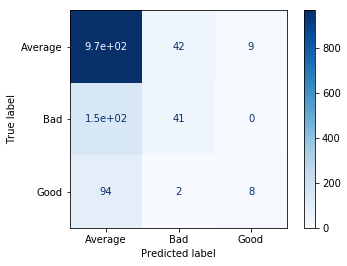

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#lets plot the f1 scores for the final model
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20, random_state = 200)
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

print ('Testing score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

#Lets print confision matrix
labels =['Average','Bad','Good']

print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [18]:
#lets print classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.80      0.95      0.87      1019
         Bad       0.48      0.21      0.30       191
        Good       0.47      0.08      0.13       104

    accuracy                           0.77      1314
   macro avg       0.58      0.41      0.43      1314
weighted avg       0.73      0.77      0.73      1314



In [208]:
#Saving the tree as a pdf

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO() 
features =['budget', 'popularity', 'runtime', 'Action','Adventure', 'Comedy', 'Crime', 'Drama', 'Horror', 'Thriller']
tree.export_graphviz(clf, out_file=dot_data, feature_names = features) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

graph[0].write_pdf("decisionTreeMoviesnonFdata.pdf")  # must access graph's first element

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
